In [38]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import seaborn as sns

import statsmodels.api as sm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/charles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
sns.set()

# Loading the data

In [4]:
file = "../Data/result_full_factorial_pgm.csv"

In [5]:
data = pd.read_csv(file)

In [6]:
data.head()

,Unnamed: 0,Unnamed: 0.1,enzyme_complex_concentration,enzyme_concentration,k1_bwd_effective,k1_bwd_relative,k1_fwd_effective,k1_fwd_relative,k2_bwd_effective,k2_bwd_relative,k2_fwd_effective,k2_fwd_relative,mu_mass,product_concentration,realization,sigma_mass,substrate_concentration,volume_fraction
0,0,0,0.000058,0.000006,4.503135,0.450314,262554.802451,1.723016,7.139138e+05,2.164051,9.907347,0.450334,12.1,0.000098,2.0,0.000,0.000049,0.2
1,1,0,0.000006,0.000058,4.491493,0.449149,285144.598410,1.871261,6.227429e+05,1.887689,9.879449,0.449066,12.1,0.000147,3.0,0.000,0.000245,0.2
2,2,0,0.000019,0.000045,7.636543,0.763654,262351.891789,1.721684,6.597299e+05,1.999806,16.799770,0.763626,31.9,0.000016,5.0,0.825,0.000024,0.2
3,3,0,0.000013,0.000051,0.634308,0.063431,484409.307429,3.178936,1.063666e+06,3.224238,1.395557,0.063434,12.1,0.000196,8.0,0.000,0.000012,0.4
4,4,0,0.000006,0.000058,4.416002,0.441600,281281.994713,1.845913,5.871605e+05,1.779830,9.719614,0.441801,12.1,0.000049,4.0,0.000,0.000147,0.2


In [7]:
data.shape

(151956, 18)

In [8]:
data.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
enzyme_complex_concentration    float64
enzyme_concentration            float64
k1_bwd_effective                float64
k1_bwd_relative                 float64
k1_fwd_effective                float64
k1_fwd_relative                 float64
k2_bwd_effective                float64
k2_bwd_relative                 float64
k2_fwd_effective                float64
k2_fwd_relative                 float64
mu_mass                         float64
product_concentration           float64
realization                     float64
sigma_mass                      float64
substrate_concentration         float64
volume_fraction                 float64
dtype: object

In [9]:
data.drop('Unnamed: 0.1', axis=1, inplace=True)
data.drop("Unnamed: 0",axis = 1, inplace = True)
data.head()

,enzyme_complex_concentration,enzyme_concentration,k1_bwd_effective,k1_bwd_relative,k1_fwd_effective,k1_fwd_relative,k2_bwd_effective,k2_bwd_relative,k2_fwd_effective,k2_fwd_relative,mu_mass,product_concentration,realization,sigma_mass,substrate_concentration,volume_fraction
0,0.000058,0.000006,4.503135,0.450314,262554.802451,1.723016,7.139138e+05,2.164051,9.907347,0.450334,12.1,0.000098,2.0,0.000,0.000049,0.2
1,0.000006,0.000058,4.491493,0.449149,285144.598410,1.871261,6.227429e+05,1.887689,9.879449,0.449066,12.1,0.000147,3.0,0.000,0.000245,0.2
2,0.000019,0.000045,7.636543,0.763654,262351.891789,1.721684,6.597299e+05,1.999806,16.799770,0.763626,31.9,0.000016,5.0,0.825,0.000024,0.2
3,0.000013,0.000051,0.634308,0.063431,484409.307429,3.178936,1.063666e+06,3.224238,1.395557,0.063434,12.1,0.000196,8.0,0.000,0.000012,0.4
4,0.000006,0.000058,4.416002,0.441600,281281.994713,1.845913,5.871605e+05,1.779830,9.719614,0.441801,12.1,0.000049,4.0,0.000,0.000147,0.2


In [10]:
data.describe()

,enzyme_complex_concentration,enzyme_concentration,k1_bwd_effective,k1_bwd_relative,k1_fwd_effective,k1_fwd_relative,k2_bwd_effective,k2_bwd_relative,k2_fwd_effective,k2_fwd_relative,mu_mass,product_concentration,realization,sigma_mass,substrate_concentration,volume_fraction
count,151956.000000,151956.000000,151956.000000,151956.000000,1.519560e+05,151956.000000,1.519560e+05,151956.000000,151956.000000,151956.000000,151956.000000,151956.000000,151956.000000,151956.000000,151956.000000,151956.000000
mean,0.000032,0.000032,4.485190,0.448519,3.547550e+05,2.328080,7.684298e+05,2.329303,9.867422,0.448519,25.702332,0.000089,4.499868,0.236865,0.000088,0.287063
std,0.000017,0.000017,3.072361,0.307236,1.381388e+05,0.906536,3.001688e+05,0.909887,6.759198,0.307236,9.444865,0.000083,2.872318,0.373242,0.000083,0.151795
min,0.000006,0.000006,0.214156,0.021416,1.043541e+04,0.068482,6.777663e+04,0.205448,0.470188,0.021372,12.100000,0.000010,0.000000,0.000000,0.000010,0.000000
25%,0.000019,0.000019,1.449146,0.144915,2.328432e+05,1.528034,5.021104e+05,1.522022,3.187629,0.144892,21.100000,0.000016,2.000000,0.000000,0.000016,0.200000
50%,0.000032,0.000032,4.424981,0.442498,3.309195e+05,2.171659,7.152682e+05,2.168157,9.735084,0.442504,31.900000,0.000049,4.000000,0.000000,0.000049,0.300000
75%,0.000045,0.000045,7.243627,0.724363,4.817919e+05,3.161759,1.044737e+06,3.166859,15.936100,0.724368,31.900000,0.000147,7.000000,0.825000,0.000147,0.400000
max,0.000058,0.000058,9.947790,0.994779,1.043541e+06,6.848235,2.159815e+06,6.546940,21.885279,0.994785,36.800000,0.000245,9.000000,0.825000,0.000245,0.500000


In [11]:
data["realization"]

0         2.0
1         3.0
2         5.0
3         8.0
4         4.0
5         3.0
6         4.0
7         8.0
8         2.0
9         8.0
10        0.0
11        1.0
12        5.0
13        3.0
14        6.0
15        2.0
16        7.0
17        0.0
18        2.0
19        3.0
20        7.0
21        2.0
22        5.0
23        3.0
24        2.0
25        3.0
26        5.0
27        4.0
28        2.0
29        7.0
         ... 
151926    2.0
151927    3.0
151928    5.0
151929    7.0
151930    2.0
151931    3.0
151932    7.0
151933    4.0
151934    2.0
151935    0.0
151936    7.0
151937    2.0
151938    7.0
151939    7.0
151940    3.0
151941    2.0
151942    2.0
151943    2.0
151944    2.0
151945    8.0
151946    7.0
151947    1.0
151948    3.0
151949    7.0
151950    3.0
151951    1.0
151952    3.0
151953    8.0
151954    6.0
151955    1.0
Name: realization, Length: 151956, dtype: float64

# From the paper, theory

Linear regression to estimate $\beta$ and $\alpha_j$ in the following model:

\begin{equation*}
log(\frac{k_j}{k_{j,0}}) = \beta_j + \alpha_{E,j}log(\frac{[E]}{[E]_0}) + \alpha_{ES,j}log(\frac{[ES]}{[ES]_0})  + \alpha_{P,j}log(\frac{[P]}{[P]_0})  + \alpha_{S,j}log(\frac{[S]}{[S]_0}) 
\end{equation*}

where $j\in$ [1_bwd, 1_fwd, 2_bwd, 2_fwd],

$k$ is the effective rate constant, and $k_0$ is the relative rate constant

The given concentration is (??) $[X]/[X]_0$

knowing that be modify our data set in order to have the $log(\frac{k_j}{k_{j,0}})$ as a feature we will try to predict

In [12]:
data.dtypes

enzyme_complex_concentration    float64
enzyme_concentration            float64
k1_bwd_effective                float64
k1_bwd_relative                 float64
k1_fwd_effective                float64
k1_fwd_relative                 float64
k2_bwd_effective                float64
k2_bwd_relative                 float64
k2_fwd_effective                float64
k2_fwd_relative                 float64
mu_mass                         float64
product_concentration           float64
realization                     float64
sigma_mass                      float64
substrate_concentration         float64
volume_fraction                 float64
dtype: object

In [13]:
# create transformed dataframe
data_trans = data.copy()
data_trans['log_k1_bwd'] = np.log(data_trans['k1_bwd_effective']/data_trans['k1_bwd_relative'])
data_trans['log_k1_fwd'] = np.log(data_trans['k1_fwd_effective']/data_trans['k1_fwd_relative'])
data_trans['log_k2_bwd'] = np.log(data_trans['k2_bwd_effective']/data_trans['k2_bwd_relative'])
data_trans['log_k2_fwd'] = np.log(data_trans['k2_fwd_effective']/data_trans['k2_fwd_relative'])
data_trans['E'] = np.log(data_trans['enzyme_concentration'])
data_trans['ES'] = np.log(data_trans['enzyme_complex_concentration'])
data_trans['P'] = np.log(data_trans['product_concentration'])
data_trans['S'] = np.log(data_trans['substrate_concentration'])
data_trans.drop(['k1_bwd_effective','k1_bwd_relative', 'k1_fwd_effective',
                'k1_fwd_relative', 'k2_bwd_effective', 'k2_bwd_relative',
                'k2_fwd_effective', 'k2_fwd_relative', 'enzyme_concentration',
                'enzyme_complex_concentration', 'product_concentration',
                'substrate_concentration'], axis=1, inplace=True)
data_trans.head()

,mu_mass,realization,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
0,12.1,2.0,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-11.959213,-9.761988,-9.230543,-9.923690
1,12.1,3.0,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-9.761988,-11.959213,-8.825078,-8.314252
2,31.9,5.0,0.825,0.2,2.302585,11.934139,12.706535,3.091042,-10.013302,-10.860600,-11.022305,-10.616837
3,12.1,8.0,0.000,0.4,2.302585,11.934139,12.706535,3.091042,-9.879771,-11.266065,-8.537396,-11.309985
4,12.1,4.0,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-9.761988,-11.959213,-9.923690,-8.825078


In [14]:
data_trans["realization"]

0         2.0
1         3.0
2         5.0
3         8.0
4         4.0
5         3.0
6         4.0
7         8.0
8         2.0
9         8.0
10        0.0
11        1.0
12        5.0
13        3.0
14        6.0
15        2.0
16        7.0
17        0.0
18        2.0
19        3.0
20        7.0
21        2.0
22        5.0
23        3.0
24        2.0
25        3.0
26        5.0
27        4.0
28        2.0
29        7.0
         ... 
151926    2.0
151927    3.0
151928    5.0
151929    7.0
151930    2.0
151931    3.0
151932    7.0
151933    4.0
151934    2.0
151935    0.0
151936    7.0
151937    2.0
151938    7.0
151939    7.0
151940    3.0
151941    2.0
151942    2.0
151943    2.0
151944    2.0
151945    8.0
151946    7.0
151947    1.0
151948    3.0
151949    7.0
151950    3.0
151951    1.0
151952    3.0
151953    8.0
151954    6.0
151955    1.0
Name: realization, Length: 151956, dtype: float64

In [15]:
data_trans.describe()

,mu_mass,realization,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
count,151956.000000,151956.000000,151956.000000,151956.000000,1.519560e+05,1.519560e+05,1.519560e+05,1.519560e+05,151956.000000,151956.000000,151956.000000,151956.000000
mean,25.702332,4.499868,0.236865,0.287063,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-10.536739,-10.536876,-9.924072,-9.930650
std,9.444865,2.872318,0.373242,0.151795,1.986857e-12,4.244448e-11,3.726098e-11,5.616517e-12,0.678122,0.678200,1.173990,1.175194
min,12.100000,0.000000,0.000000,0.000000,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-11.959213,-11.959213,-11.533128,-11.533128
25%,21.100000,2.000000,0.000000,0.200000,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-10.860600,-10.860600,-11.022305,-11.022305
50%,31.900000,4.000000,0.000000,0.300000,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-10.349775,-10.349775,-9.923690,-9.923690
75%,31.900000,7.000000,0.825000,0.400000,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-10.013302,-10.013302,-8.825078,-8.825078
max,36.800000,9.000000,0.825000,0.500000,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-9.761988,-9.761988,-8.314252,-8.314252


`realization` is not a relevant variable, since it only index the sample of an experiment, hence we remove it 

In [16]:
data_trans.drop('realization',axis = 1, inplace = True)

In [17]:
data_trans.head()

,mu_mass,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
0,12.1,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-11.959213,-9.761988,-9.230543,-9.923690
1,12.1,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-9.761988,-11.959213,-8.825078,-8.314252
2,31.9,0.825,0.2,2.302585,11.934139,12.706535,3.091042,-10.013302,-10.860600,-11.022305,-10.616837
3,12.1,0.000,0.4,2.302585,11.934139,12.706535,3.091042,-9.879771,-11.266065,-8.537396,-11.309985
4,12.1,0.000,0.2,2.302585,11.934139,12.706535,3.091042,-9.761988,-11.959213,-9.923690,-8.825078


# Test the reproducibility

### for $log\left(\frac{k_{1,\text{forward,eff}}}{k_{1,\text{forward,relative}}}\right)$, using volume fraction  = $0.0$

In [18]:
# select data corresponding to our case
data_test = data_trans[data_trans['volume_fraction']==0.0]

#define the y for the regression
y = data_test["log_k1_fwd"]

#define the features we will regress on
x = data_test[['E', 'ES', 'P', 'S']].values
X = X = np.c_[np.ones(len(x)), x] #add intercept

In [19]:
def create_regressors(data_test,name):
    x = data_test[name].values
    X = np.c_[np.ones(len(x)), x]
    return X

In [20]:
data_test.size

80190

from the paper, we excpect to have the following result: 

$\beta = 7.31e-2$

$\alpha = [4.74e-3,1.07e-2,-,-]$ for the following features: S, E, ES, P

#### residuals computed from regression with all the features 

first we compute a regular linear regression in order to estimate the conitionnal variance of the residuals:

In [21]:
#fit linear model
reg = LinearRegression()
X_E = create_regressors(data_test,['E','ES','P','S'])
reg.fit(X_E,y)

#get the fitted values
y_hat = reg.predict(X_E)
residuals = (y-y_hat).values

#compute the residuals

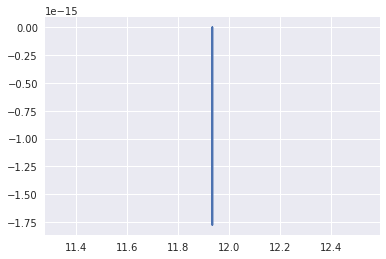

In [22]:
plt.plot(y_hat,residuals)
plt.show()

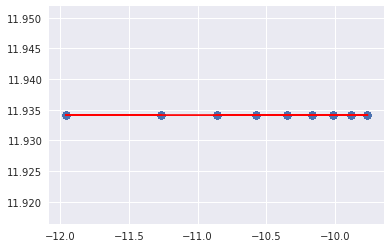

In [23]:
plt.scatter(y = y, x = data_test['E'].values)
plt.plot(data_test['E'].values, y_hat,color='red')
plt.show()

since s = RSS: 

In [24]:
weight_estimate = np.sqrt(np.var(residuals)/(X_E.size -2))

In [25]:
data_test_weighted = data_test.copy()
data_test_weighted['E'] =  data_trans['E']/weight_estimate
data_test_weighted['ES'] = data_trans['ES']/weight_estimate
data_test_weighted['P'] =  data_trans['P']/weight_estimate
data_test_weighted['S'] =  data_trans['S']/weight_estimate
data_test_weighted.describe()

,mu_mass,sigma_mass,volume_fraction,log_k1_bwd,log_k1_fwd,log_k2_bwd,log_k2_fwd,E,ES,P,S
count,7.290000e+03,7.290000e+03,7290.0,7.290000e+03,7.290000e+03,7.290000e+03,7.290000e+03,7.290000e+03,7.290000e+03,7.290000e+03,7.290000e+03
mean,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-6.850078e+18,-6.850078e+18,-6.451497e+18,-6.451497e+18
std,3.886935e-12,1.090314e-13,0.0,1.812077e-13,1.460216e-12,1.163594e-12,3.884735e-13,4.408877e+17,4.408877e+17,7.631140e+17,7.631140e+17
min,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-7.774812e+18,-7.774812e+18,-7.497810e+18,-7.497810e+18
25%,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-7.060592e+18,-7.060592e+18,-7.165718e+18,-7.165718e+18
50%,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-6.728499e+18,-6.728499e+18,-6.451497e+18,-6.451497e+18
75%,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-6.509755e+18,-6.509755e+18,-5.737278e+18,-5.737278e+18
max,3.190000e+01,8.250000e-01,0.0,2.302585e+00,1.193414e+01,1.270654e+01,3.091042e+00,-6.346373e+18,-6.346373e+18,-5.405184e+18,-5.405184e+18


In [26]:
reg = LinearRegression()
X = create_regressors(data_test_weighted,['E','ES','P','S'])
reg.fit(X,y)

print(reg.coef_)


[ 0.00000000e+00  1.90744032e-35  1.47240185e-35 -2.57326958e-36
 -1.47302895e-35]


#### residuals computed for each feature individually

In [27]:
def estimate_weight(data,covariate):
    
    y = data["log_k1_bwd"]
    #regression only with a certain feature covariate
    reg = LinearRegression()
    X = create_regressors(data,covariate)
    reg.fit(X,y)

    #find the residuals
    y_hat = reg.predict(X)
    residuals = (y-y_hat).values

    #computation of the weight
    weight_estimate = np.sqrt(np.var(residuals)/(X.size -2))
    
    return weight_estimate

In [28]:
covariates = ['E','S','ES','P']
weights = []

for name in covariates:
    weights.append(estimate_weight(data_test,name))

In [29]:
print(weights)

[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]


we obtain the same weight for the different covariates

In [30]:
# count the different type of volume occupation
vfraction = data['volume_fraction'].values
unique = np.unique(vfraction)

In [31]:
Weight = []
for volume in unique:
    w = []
    data = data_trans[data_trans['volume_fraction']==volume]
    for name in covariates:
        w.append(estimate_weight(data_test,name))
    Weight.append(w)
    print(w)

[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]
[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]
[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]
[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]
[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]
[1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18, 1.529293643074293e-18]


In [32]:
tab_weights2 = pd.DataFrame(Weight)

In [33]:
tab_weights[0].values[0]

NameError: name 'tab_weights' is not defined

In [34]:
tab_weights2[0].values[0]

1.529293643074293e-18

issue : same weight for all types of concentration

but it is still different for the different coefficient we are trying to estimate:

for y1_forward : 2.4322071957924314e-18

for y1_backward: 1.529293643074293e-18

let's try to do a weigthed regression with these weights:

In [35]:
reg = LinearRegression()

data_test_weighted = data_trans.copy()
data_test_weighted['E'] =  data_trans['E']/1.529293643074293e-18
data_test_weighted['ES'] = data_trans['ES']/1.529293643074293e-18
data_test_weighted['P'] =  data_trans['P']/1.529293643074293e-18
data_test_weighted['S'] =  data_trans['S']/1.529293643074293e-18


D = data_test_weighted[data_test_weighted["volume_fraction"]==0.2]
X = create_regressors(D,covariates)
y = D["log_k1_bwd"]

reg.fit(X,y)

reg.coef_

array([0.00000000e+00, 9.42997935e-36, 1.46106583e-36, 7.01675055e-36,
       1.36772257e-36])

In [36]:
reg.coef_/1.529293643074293e-18

array([0.00000000e+00, 6.16623197e-18, 9.55386061e-19, 4.58822972e-18,
       8.94349214e-19])

In [41]:
w = 1#.529293643074293e-18

mod_wls = sm.WLS(y, X, weights=1./(w))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                    WLS Regression Results                                    
Dep. Variable:             log_k1_bwd   R-squared:          -99121196950569461207852384256.000
Model:                            WLS   Adj. R-squared:     -99131396003623775664924000256.000
Method:                 Least Squares   F-statistic:                                    -9719.
Date:                Sun, 18 Nov 2018   Prob (F-statistic):                               1.00
Time:                        19:46:29   Log-Likelihood:                                 52158.
No. Observations:               29160   AIC:                                        -1.043e+05
Df Residuals:                   29156   BIC:                                        -1.043e+05
Df Model:                           3                                                         
Covariance Type:            nonrobust                                                         
                 coef    std err          t      P